### Importación de datos



In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


In [6]:
# Definir nuevamente los paths
file_paths = {
    "Tienda 1": "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv",
    "Tienda 2": "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv",
    "Tienda 3": "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv",
    "Tienda 4": "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"
}

# Leer y combinar los archivos en un solo DataFrame
dataframes = []
for tienda, path in file_paths.items():
    df = pd.read_csv(path)
    df["Tienda"] = tienda
    dataframes.append(df)

df_tiendas = pd.concat(dataframes, ignore_index=True)

df_tiendas.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon,Tienda
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175,Tienda 1
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359,Tienda 1
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444,Tienda 1
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250,Tienda 1
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359,Tienda 1


#1. Análisis de facturación



In [7]:
# Calcular facturación
df_tiendas["Facturacion"] = df_tiendas["Precio"] + df_tiendas["Costo de envío"]
facturacion_por_tienda = df_tiendas.groupby("Tienda")["Facturacion"].sum().sort_values(ascending=False).reset_index()

facturacion_por_tienda


,Tienda,Facturacion
0,Tienda 1,1.212258e+09
1,Tienda 2,1.175829e+09
2,Tienda 3,1.156536e+09
3,Tienda 4,1.093693e+09


<ipython-input-8-655db6f0dab7>:16: UserWarning: Glyph 128176 (\N{MONEY BAG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128176 (\N{MONEY BAG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


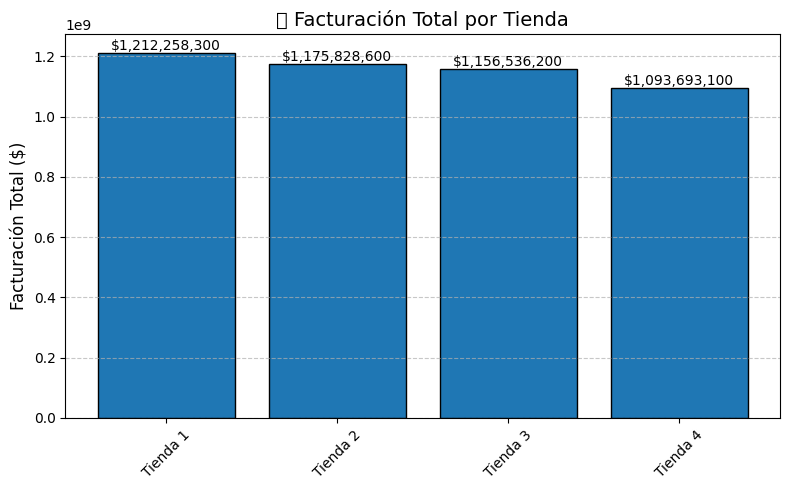

In [8]:
import matplotlib.pyplot as plt

# Crear gráfico de barras para facturación por tienda
plt.figure(figsize=(8, 5))
bars = plt.bar(facturacion_por_tienda["Tienda"], facturacion_por_tienda["Facturacion"], edgecolor='black')
plt.title("💰 Facturación Total por Tienda", fontsize=14)
plt.ylabel("Facturación Total ($)", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Etiquetas encima de las barras
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval, f"${yval:,.0f}", va='bottom', ha='center', fontsize=10)

plt.tight_layout()
plt.show()

# 2. Ventas por categoría

In [16]:
#Segmentar las ventas por categoria

df_tiendas.columns
df_ventas_por_categoria = df_tiendas.groupby("Categoría del Producto")["Facturacion"].sum().sort_values(ascending=False).reset_index()

df_ventas_por_categoria



,Categoría del Producto,Facturacion
0,electrónicos,1.749039e+09
1,electrodomésticos,1.395147e+09
2,muebles,7.981114e+08
3,instrumentos musicales,3.672769e+08
4,deportes y diversión,1.506693e+08
5,juguetes,7.762570e+07
6,artículos para el hogar,6.069090e+07
7,libros,3.975600e+07


<ipython-input-17-14b37382b102>:8: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


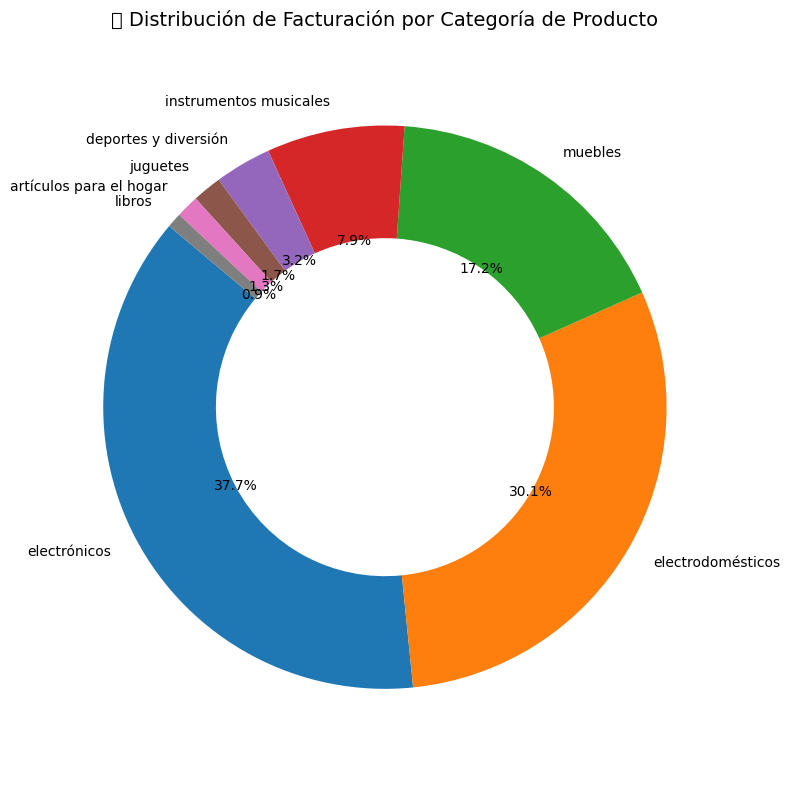

In [17]:
# Crear gráfico de torta con la facturación por categoría
plt.figure(figsize=(8, 8))
plt.pie(df_ventas_por_categoria["Facturacion"],
        labels=df_ventas_por_categoria["Categoría del Producto"],
        autopct='%1.1f%%', startangle=140, wedgeprops=dict(width=0.4))
plt.title("📦 Distribución de Facturación por Categoría de Producto", fontsize=14)
plt.axis('equal')  # Para que sea perfectamente circular
plt.tight_layout()
plt.show()


# 3. Calificación promedio de la tienda


In [19]:
#Calculamos el promedio de calificación de cada tienda

df_tiendas.columns
df_calificacion_por_tienda = df_tiendas.groupby("Tienda")["Calificación"].mean().sort_values(ascending=False).reset_index()

df_calificacion_por_tienda


,Tienda,Calificación
0,Tienda 3,4.048326
1,Tienda 2,4.037304
2,Tienda 4,3.995759
3,Tienda 1,3.976685


<ipython-input-21-bb6196fbd8b3>:23: UserWarning: Glyph 11088 (\N{WHITE MEDIUM STAR}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 11088 (\N{WHITE MEDIUM STAR}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


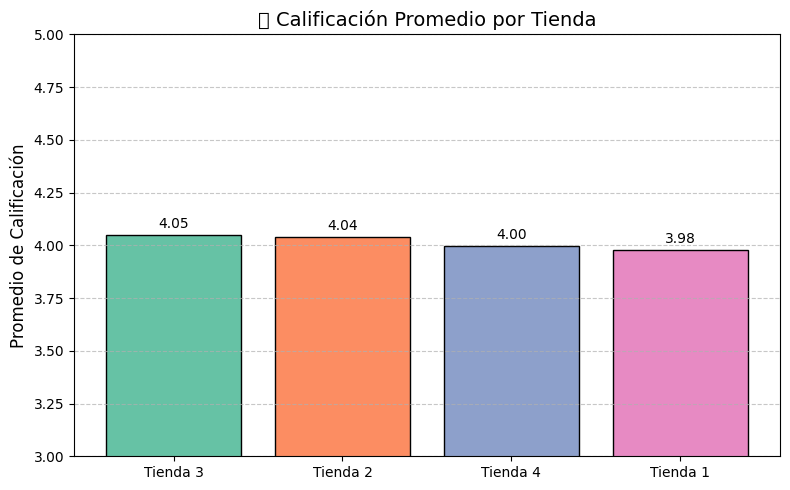

In [21]:
import seaborn as sns

# Crear una paleta de colores personalizada
palette = sns.color_palette("Set2", len(df_calificacion_por_tienda))

# Gráfico de barras con nueva escala y colores mejor diferenciados
plt.figure(figsize=(8, 5))
bars = plt.bar(df_calificacion_por_tienda["Tienda"],
               df_calificacion_por_tienda["Calificación"],
               color=palette, edgecolor='black')

plt.title("⭐ Calificación Promedio por Tienda", fontsize=14)
plt.ylabel("Promedio de Calificación", fontsize=12)
plt.ylim(3, 5)  # Escala ajustada para ver mejor las diferencias
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Etiquetas con dos decimales
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval + 0.02, f"{yval:.2f}",
             va='bottom', ha='center', fontsize=10)

plt.tight_layout()
plt.show()


# 4. Productos más y menos vendidos

In [27]:
#Segmentamos por productos mas y menos vendidos

df_productos_mas_vendidos= df_tiendas.groupby("Producto")["Facturacion"].sum().sort_values(ascending=False).reset_index()
df_productos_menos_vendidos= df_tiendas.groupby("Producto")["Facturacion"].sum().sort_values(ascending=True).reset_index()

# Mostrar los 10 más y los 10 menos vendidos
top_10_mas = df_productos_mas_vendidos.head(10)
top_10_menos = df_productos_menos_vendidos.head(10)

top_10_mas
top_10_menos

,Producto,Facturacion
0,Cubo mágico 8x8,2942000.0
1,Cuerda para saltar,3332400.0
2,Dinosaurio Rex,3370100.0
3,Ajedrez de madera,5424500.0
4,Set de vasos,5946200.0
5,Dashboards con Power BI,6797600.0
6,Bloques de construcción,7131500.0
7,Vaso térmico,8947400.0
8,Cubertería,8979400.0
9,Muñeca bebé,9003500.0


<ipython-input-32-064c8c1069f2>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Facturacion", y="Producto", data= top_10_mas, palette="crest")
<ipython-input-32-064c8c1069f2>:8: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


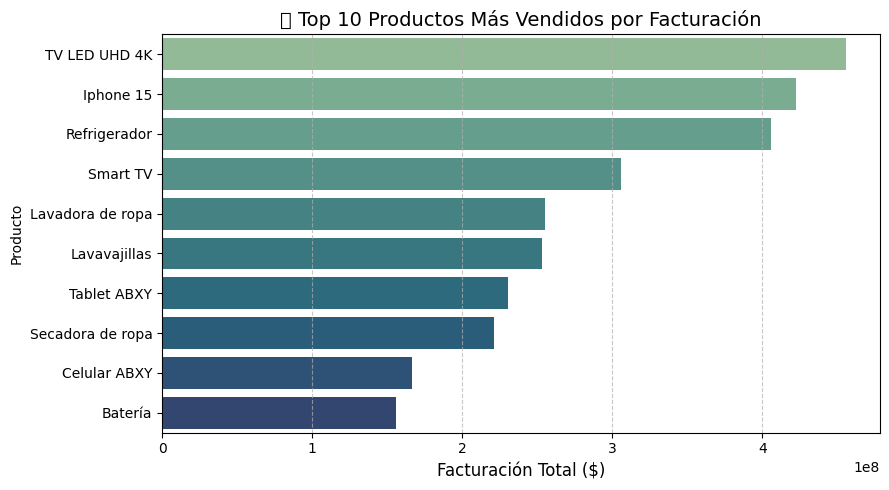

,Producto,Facturacion
0,TV LED UHD 4K,455524500.0
1,Iphone 15,422445600.0
2,Refrigerador,405393000.0
3,Smart TV,305662600.0
4,Lavadora de ropa,255357300.0
5,Lavavajillas,253345200.0
6,Tablet ABXY,230721200.0
7,Secadora de ropa,221432200.0
8,Celular ABXY,166322800.0
9,Batería,155680600.0


In [32]:
# Gráfico: Productos más vendidos
plt.figure(figsize=(9, 5))
sns.barplot(x="Facturacion", y="Producto", data= top_10_mas, palette="crest")
plt.title("🔥 Top 10 Productos Más Vendidos por Facturación", fontsize=14)
plt.xlabel("Facturación Total ($)", fontsize=12)
plt.ylabel("Producto")
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
top_10_mas


<ipython-input-33-c83716a140e4>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Facturacion", y="Producto", data=top_10_menos, palette="flare")


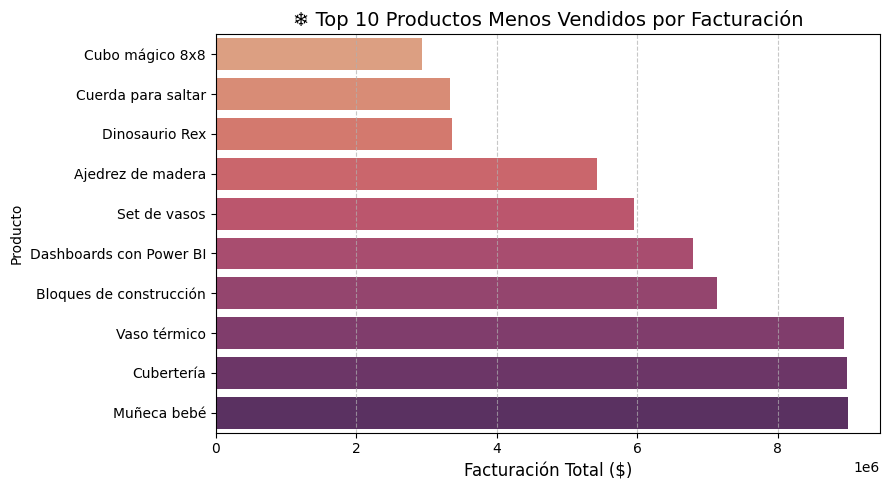

,Producto,Facturacion
0,Cubo mágico 8x8,2942000.0
1,Cuerda para saltar,3332400.0
2,Dinosaurio Rex,3370100.0
3,Ajedrez de madera,5424500.0
4,Set de vasos,5946200.0
5,Dashboards con Power BI,6797600.0
6,Bloques de construcción,7131500.0
7,Vaso térmico,8947400.0
8,Cubertería,8979400.0
9,Muñeca bebé,9003500.0


In [33]:

# Gráfico: Productos menos vendidos
plt.figure(figsize=(9, 5))
sns.barplot(x="Facturacion", y="Producto", data=top_10_menos, palette="flare")
plt.title("❄️ Top 10 Productos Menos Vendidos por Facturación", fontsize=14)
plt.xlabel("Facturación Total ($)", fontsize=12)
plt.ylabel("Producto")
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
top_10_menos


# 5. Envío promedio por tienda

In [34]:
#FILTRAMOS EL PROMEDIO DE ENVIO POR TIENDA

df_tiendas.columns
df_envio_por_tienda = df_tiendas.groupby("Tienda")["Costo de envío"].mean().sort_values(ascending=False).reset_index()

df_envio_por_tienda

,Tienda,Costo de envío
0,Tienda 1,26018.609580
1,Tienda 2,25216.235693
2,Tienda 3,24805.680373
3,Tienda 4,23459.457167


<ipython-input-36-ac8e2eef3370>:30: UserWarning: Glyph 128666 (\N{DELIVERY TRUCK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128666 (\N{DELIVERY TRUCK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


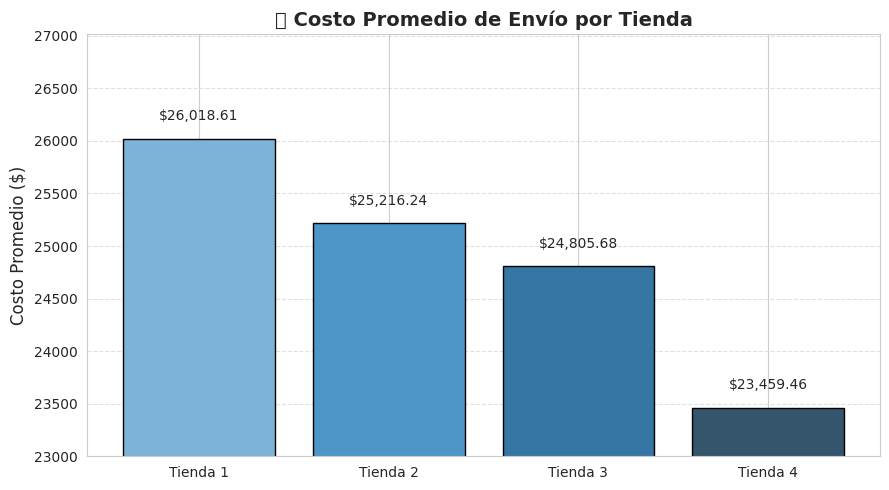

,Tienda,Costo de envío
0,Tienda 1,26018.609580
1,Tienda 2,25216.235693
2,Tienda 3,24805.680373
3,Tienda 4,23459.457167


In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

# Datos de costo promedio de envío por tienda
df_envio_promedio_por_tienda = df_tiendas.groupby("Tienda")["Costo de envío"].mean().sort_values(ascending=False).reset_index()

# Estética y estilo
plt.figure(figsize=(9, 5))
sns.set_style("whitegrid")
colors = sns.color_palette("Blues_d", len(df_envio_promedio_por_tienda))

# Crear gráfico de barras
bars = plt.bar(df_envio_promedio_por_tienda["Tienda"],
               df_envio_promedio_por_tienda["Costo de envío"],
               color=colors,
               edgecolor="black")

# Título y etiquetas
plt.title("🚚 Costo Promedio de Envío por Tienda", fontsize=14, weight='bold')
plt.ylabel("Costo Promedio ($)", fontsize=12)
plt.ylim(23000, df_envio_promedio_por_tienda["Costo de envío"].max() + 1000)
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Etiquetas encima de las barras
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval + 150, f"${yval:,.2f}",
             ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()


## ✅ Conclusión Final – Recomendación para el Sr. Juan

Después de realizar un análisis exhaustivo de las 4 tiendas de Alura Store, considerando métricas clave como **facturación**, **calificaciones de los clientes**, **productos más y menos vendidos**, **categorías de alto rendimiento**, y **costos de envío**, la recomendación es clara:

### 🔻 El Sr. Juan debería considerar vender la **Tienda 4**.

### ¿Por qué?
- 💸 **Es la tienda con menor facturación total**, casi $120 millones por debajo de la Tienda 1.
- ⭐ **Aunque tiene el envío promedio más bajo**, también tiene el **promedio de calificación más bajo**, lo que indica menor satisfacción del cliente.
- 📉 **No se destaca en ninguna categoría de producto** ni tiene presencia significativa entre los productos más vendidos.
- ⚠️ Su baja performance general podría dificultar escalar o sostener su rentabilidad en el tiempo.

Esta decisión permitiría al Sr. Juan **capitalizar un activo poco rentable** para enfocarse en nuevas oportunidades o reforzar las tiendas más exitosas.

---

> 💡 *El análisis de datos no solo permitió identificar la tienda menos eficiente, sino también brindó un panorama integral sobre el desempeño comercial, la satisfacción del cliente y las oportunidades de mejora dentro del negocio.*
